<a href="https://colab.research.google.com/github/shivasaxena23/Experiments-DNN-Offloading/blob/main/ALGIII_Know_Remote_Processing_time_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Randomized algorithm

In [ ]:
!pip install dataframe-image

     |████████████████████████████████| 1.3MB 6.8MB/s 
     |████████████████████████████████| 296kB 39.3MB/s 
     |████████████████████████████████| 143kB 38.8MB/s 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import math

In [2]:
with open('vgg19_compute_values (1).npy', 'rb') as f:
  vgg16_compute_values = np.load(f)

In [3]:
vgg16_compute_values.shape

(23539, 19)

In [4]:
vgg16_compute_values[0]

array([0.03391266, 0.00308251, 0.00077176, 0.00025868, 0.00016093,
       0.00021362, 0.00014138, 0.00016761, 0.00015068, 0.00014281,
       0.00013471, 0.00039506, 0.00034285, 0.00031734, 0.00033474,
       0.00038338, 0.02665401, 0.00036669, 0.00018716])

In [5]:
vgg16_compute_values_remote = vgg16_compute_values[20:10000,:]

In [6]:
vgg16_compute_values_remote_expected = np.mean(vgg16_compute_values_remote,axis=0)

In [7]:
vgg16_compute_values_local_array = []
vgg16_compute_values_local_array.append(vgg16_compute_values_remote*(1+2*random.random()))
vgg16_compute_values_local_array.append(vgg16_compute_values_remote*(3+2*random.random()))
vgg16_compute_values_local_array.append(vgg16_compute_values_remote*(7+2*random.random()))
vgg16_compute_values_local_array.append(vgg16_compute_values_remote*(15+2*random.random()))
vgg16_compute_values_local_array.append(vgg16_compute_values_remote*(4*random.random()))
vgg16_compute_values_local_array.append(vgg16_compute_values_remote*(2+4*random.random()))

In [8]:
pd_vgg16_table = pd.DataFrame()

In [9]:
pd_vgg16_table['Remote'] = vgg16_compute_values_remote_expected
pd_vgg16_table['Device2'] = np.mean(vgg16_compute_values_local_array[0],axis=0)
pd_vgg16_table['Device4'] = np.mean(vgg16_compute_values_local_array[1],axis=0)
pd_vgg16_table['Device8'] = np.mean(vgg16_compute_values_local_array[2],axis=0)
pd_vgg16_table['Device16'] = np.mean(vgg16_compute_values_local_array[3],axis=0)
pd_vgg16_table['Device2r'] = np.mean(vgg16_compute_values_local_array[4],axis=0)
pd_vgg16_table['Device4r'] = np.mean(vgg16_compute_values_local_array[5],axis=0)

In [10]:
pd_vgg16_table

,Remote,Device2,Device4,Device8,Device16,Device2r,Device4r
0,0.000160,0.000479,0.000656,0.001158,0.002694,0.000174,0.000777
1,0.000151,0.000451,0.000617,0.001090,0.002537,0.000164,0.000732
2,0.000131,0.000392,0.000536,0.000947,0.002203,0.000143,0.000636
3,0.000138,0.000413,0.000566,0.000999,0.002325,0.000151,0.000671
4,0.000109,0.000327,0.000448,0.000790,0.001839,0.000119,0.000531
5,0.000104,0.000311,0.000426,0.000751,0.001749,0.000113,0.000505
6,0.000100,0.000298,0.000408,0.000721,0.001678,0.000109,0.000484
7,0.000130,0.000390,0.000534,0.000943,0.002195,0.000142,0.000633
8,0.000105,0.000314,0.000429,0.000758,0.001765,0.000114,0.000509
9,0.000099,0.000296,0.000406,0.000716,0.001667,0.000108,0.000481


In [11]:
pd_vgg16 = pd.DataFrame(np.array(vgg16_compute_values_local_array[0]))

In [12]:
df_vgg16 = pd_vgg16.stack().reset_index(level=0, drop=True).reset_index()
df_vgg16.columns = ['Layer', 'Latency']

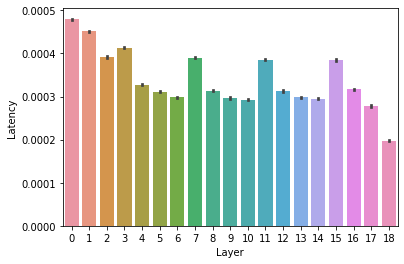

In [13]:
x = [i for i in range(20)]
plt.xticks(x)
sns.barplot(x="Layer",y="Latency", data=df_vgg16, ci=95)


In [14]:
#input_data_real = [3072, 65536, 16884, 32768, 8192, 16384, 16384, 16384, 4096, 8192, 8192, 8192, 2048, 2048, 2048, 2048, 512, 4096, 4096]

#imagenet
input_data_real = 64*np.array([3072, 65536, 16884, 32768, 8192, 16384, 16384, 16384, 4096, 8192, 8192, 8192, 2048, 2048, 2048, 2048, 512, 4096, 4096])

input_data_monotone = [65536, 65536, 32768, 32768, 16384, 16384, 16384, 16384, 8192, 8192, 8192, 8192, 2048, 2048, 2048, 2048, 512, 512, 512]

In [15]:
input_data_real[0]

196608

In [16]:
in_ratio = 1
min = input_data_real[0]
for i in input_data_real:
  if in_ratio < i/min:
    in_ratio = i/min

print(in_ratio)


21.333333333333332


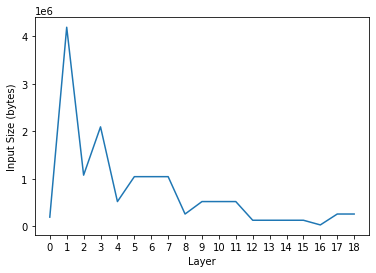

In [17]:
ip_data = pd.DataFrame(np.array(input_data_real))
ip_data.reset_index(level=0, inplace=True)
ip_data.columns = ['Layer','Input Size (bytes)']
x = [i for i in range(len(input_data_real))]
plt.xticks(x)
sns.lineplot(x="Layer",y="Input Size (bytes)", data=ip_data, ci=95)


In [18]:
norm = sum(np.mean(vgg16_compute_values_local_array[1],axis=0))/input_data_real[0]
link_rate = 1/norm
link_rate

22320412.468537167

In [19]:
# updated as we want to compare same general linkrate with a limit to how slow it can get, multiplicatively
# updated it back cause we want to check for uniformly distributed linkrate about same value with increasing max ratio

def randComm(ratio,link_rate):
  sq = math.sqrt(ratio)
  return link_rate/sq + random.random()*(link_rate*sq-link_rate/sq)

# def randComm(ratio,link_rate):
#   return link_rate/ratio + random.random()*(link_rate-link_rate/ratio)

In [20]:
def OPT(current_comms_uniform,current_comps_local,current_comps_remote):
  
  current_comps = []
  current_comms = []
  
  best = current_comms_uniform[0] + np.sum(current_comps_remote)
  i = 0
  comms_counter = 1
  best_point = 0
  
  for l in current_comps_local:

      current_comp = l
      current_comm = current_comms_uniform[comms_counter]
      
      current_comps.append(current_comp)
      current_comms.append(current_comm)
      
      if sum(current_comps) + current_comm + np.sum(current_comps_remote[comms_counter:]) < best:
          best_point = i+1
          best = sum(current_comps) + current_comm + np.sum(current_comps_remote[comms_counter:])
  
      i = i + 1
      comms_counter = comms_counter + 1
  
  return best_point, best


In [22]:
def ALGIII(current_comms_uniform,current_comps_local,current_comps_remote,p):  
  current_comps = []
  current_comms = []
  best = current_comms_uniform[0]
  best_point = 0
  last_best = 0
  last_flag = 0
  flag = 0
  best_comm = current_comms_uniform[0]
  last_best_comm = best_comm
  i = 0
  comms_counter = 1

  comm_t = 0
  local_t = 0
  remote_t = 0
  pcomm_t = 0
  plocal_t = 0
  premote_t = 0
  
  mins = [0]

  for l in current_comps_local:

      current_comp = l
      current_comm = current_comms_uniform[comms_counter]
      
      current_comps.append(current_comp)
      current_comms.append(current_comm)

      if sum(current_comps)-sum(current_comps_remote[:comms_counter]) + current_comm < best: #Updating
          best_point = i+1
          best = sum(current_comps)-sum(current_comps_remote[:comms_counter]) + current_comm
          best_comm = current_comm
          flag = 1

          mins.append(best_point)
          
          if random.random() < p: #When it offloads with probability 'p'
          
            if sum(current_comps[last_best:best_point]) > last_best_comm : #Data was offloaded at last best, take into account remote processing
              pcomm_t = pcomm_t + last_best_comm
              premote_t = premote_t + sum(current_comps[last_best:best_point]) - last_best_comm 
              #it could have processed even more than the layers between last_best and best_point remotely, but it cannot finish processing remotely
              #because then it would make last_best a better offload point
            else: #Data was offloaded at last best, no remote processing
              pcomm_t = pcomm_t + sum(current_comps[last_best:best_point])

            last_best = best_point
            last_best_comm = best_comm
            last_flag = 1

      if sum(current_comps[best_point:])-sum(current_comps_remote[best_point:comms_counter]) > best_comm: #Offload as best_point was opt_point
        #compare last offload at last_best with current offload point
        if last_best_comm + sum(current_comps_remote[last_best:comms_counter]) < sum(current_comps[last_best:]) + current_comm: #last_offload was better
          if last_best_comm + sum(current_comps_remote[best_point:comms_counter]) < sum(current_comps[last_best:]):
            plocal_t = last_best_comm + sum(current_comps_remote[best_point:comms_counter]) #double check
          else:
            plocal_t = sum(current_comps[last_best:])
          # if sum(current_comps[last_best:]) < last_best_comm + sum(current_comps_remote[best_point:comms_counter]):
          #   plocal_t = sum(current_comps[last_best:])
          # else:
          #   plocal_t = last_best_comm + sum(current_comps_remote[best_point:comms_counter])
        else:
          if last_best_comm > sum(current_comps[last_best:]):
            pcomm_t = pcomm_t + sum(current_comps[last_best:])
          else:
            pcomm_t = pcomm_t + last_best_comm
            premote_t = premote_t + sum(current_comps[last_best:]) - last_best_comm
        break

      i = i + 1
      comms_counter = comms_counter + 1

  # if last_flag == 1:
  #   algI = sum(current_comps_local[:i]) + current_comms_uniform[i] + sum(current_comps_remote[i:])
  #   algII = sum(current_comps_local[:last_best]) + current_comms_uniform[last_best] + sum(current_comps_remote[last_best:])
  #   alg_best = np.minimum(algI,algII)
  # elif flag == 1 :
  #   alg_best = sum(current_comps_local[:i]) + current_comms_uniform[i] + sum(current_comps_remote[i:])
  # else:
  #   alg_best = sum(current_comps_local[:i]) + current_comms_uniform[i] + sum(current_comps_remote[i:])
  
  # if best_point == 0:
  #   alg_best = sum(current_comps_local[:best_point]) + current_comms_uniform[best_point] + sum(current_comps_remote[best_point:])

  algI = sum(current_comps_local[:i]) + current_comms_uniform[i] + sum(current_comps_remote[i:])
  algII = sum(current_comps_local[:last_best]) + current_comms_uniform[last_best] + sum(current_comps_remote[last_best:])

  z = 0

  if last_flag == 1:
    if algI < algII:
      alg_best = algI
      local_t = sum(current_comps_local[:i])
      comm_t = current_comms_uniform[i]
      remote_t = sum(current_comps_remote[i:])
    else:
      alg_best = algII
      local_t = sum(current_comps_local[:last_best]) #remove if erronous
      comm_t = current_comms_uniform[last_best]
      remote_t = sum(current_comps_remote[last_best:])
    z=1
  else:
    if random.random() < p:
      if algI < algII:
        if last_best_comm > sum(current_comps_local[:i]):
          pcomm_t = sum(current_comps_local[:i])
        else:
          pcomm_t = last_best_comm
          premote_t = sum(current_comps_local[:i]) - last_best_comm
        alg_best = algI
      else:
        comm_t = last_best_comm
        remote_t = sum(current_comps_remote[last_best:])
        if sum(current_comps_local[:i]) < comm_t+remote_t:
          plocal_t = sum(current_comps_local[:i]) #remove if errornous
        else:
          plocal_t = comm_t+remote_t #remove if erronous
        alg_best = algII
    else:
      local_t = sum(current_comps_local[:i])
      comm_t = current_comms_uniform[i]
      remote_t = sum(current_comps_remote[i:])
      alg_best = algI
    z=1
  if z == 0:
    print (i,last_best, best_point)

  net_local = local_t + plocal_t
  net_comm = comm_t + pcomm_t
  net_remote = remote_t + premote_t

  return i, alg_best, algI, current_comms_uniform[i], best_point, best, best_comm, net_local, net_comm, net_remote, mins

In [23]:
random.random()

0.20350507963502995

In [24]:
def ALG(current_comms_uniform,current_comps_local,current_comps_remote):  
  current_comps = []
  current_comms = []
  
  best = current_comms_uniform[0]
  best_point = 0
  best_comm = current_comms_uniform[0]
  i = 0
  comms_counter = 1

  for l in current_comps_local:

      current_comp = l
      current_comm = current_comms_uniform[comms_counter]
      
      current_comps.append(current_comp)
      current_comms.append(current_comm)

      if sum(current_comps)-sum(current_comps_remote[:comms_counter]) + current_comm < best:
          best_point = i+1
          best = sum(current_comps)-sum(current_comps_remote[:comms_counter]) + current_comm
          best_comm = current_comm

      if sum(current_comps[best_point:])-sum(current_comps_remote[best_point:comms_counter]) > best_comm:
        break

      i = i + 1
      comms_counter = comms_counter + 1

  alg_best = sum(current_comps_local[:i]) + current_comms_uniform[i] + sum(current_comps_remote[i:])

  return i, alg_best, current_comms_uniform[i], best_point, best, best_comm

In [ ]:
# #Trial

# current_comms_uniform = [k/randComm(2,link_rate) for k in input_data_real]
# current_comms_uniform.append(0)
# current_comps_local = vgg16_compute_values_local_array[1][2200]
# current_comps_remote = vgg16_compute_values_remote_expected

# opt_best_point, opt_best = OPT(current_comms_uniform,current_comps_local,current_comps_remote)
# alg_best_point, alg_best, c_cut, c_opt = ALG(current_comms_uniform,current_comps_local,current_comps_remote)

# alg_theory_best = 1 + c_cut/(c_opt + sum(current_comps_remote))

# if alg_best < opt_best:
#   print("fail best")
#   exit(1)
# if alg_best_point < opt_best_point:
#   print("fail best point")
#   exit(1)
# if alg_best > alg_theory_best :
#   print("does not satisfy proof")
#   exit(1)

# print(alg_best/opt_best)
# print(opt_best_point,alg_best_point)
# print(current_comps_local)
# print(current_comps_remote)
# print(current_comms_uniform)

In [25]:
ratio_local_samples = []
ratio_local_diff = []
ratio_local_zero = []

time_local_samples = []
time_comm_samples = []
time_remote_samples = []

local_alg_theory_best_samples = []
local_ratio_best_samples = []
local_performance_best_samples = []


In [26]:
def min_makespan_proof(current_comms_uniform,current_comps_local,current_comps_remote):
  best_i = 0
  best = current_comms_uniform[0] + sum(current_comps_remote)

  for i in range(len(current_comps_remote)+1):
    if sum(current_comps_local[:i]) + current_comms_uniform[i] + sum(current_comps_remote[i:]) < best:
      best = sum(current_comps_local[:i]) + current_comms_uniform[i] + sum(current_comps_remote[i:])
      best_i = i

  return best_i, best

In [27]:
#ratios = [1.5,2,3,4,8]
r=3
i = 0
probabilities = [0,0.2,0.4,0.6,0.8,1]

def generateSamples():
  k=0

  l = 0
  for p in probabilities:
    samples = []
    diff = []
    zero = []
    local_samples = []
    comm_samples = []
    remote_samples = []

    alg_theory_best_samples = []
    ratio_best_samples = []
    performance_best_samples = []

    for j in range(1):
      current_comms_uniform = [k/randComm(r,link_rate) for k in input_data_real]
      current_comms_uniform.append(0)
      current_comps_local = vgg16_compute_values_local_array[i][j]
      current_comps_remote = vgg16_compute_values_remote_expected
      print(len(current_comms_uniform))
      print(len(current_comps_local))
      print(len(current_comps_remote))
      opt_best_point, opt_best = OPT(current_comms_uniform,current_comps_local,current_comps_remote)
      alg_best_point, alg_best, algI, c_cut, best_point, best, c_opt, net_local, net_comm, net_remote, mins = ALGIII(current_comms_uniform,current_comps_local,current_comps_remote,p)
      rho_theory_best = 1 + (1-p)*c_cut/(c_opt + sum(current_comps_remote))
      M = len(mins)
      performance_best = math.pow((1-p),M)*algI
      for m in range(len(mins)):
        min_m = sum(current_comps_local[:mins[m]]) + current_comms_uniform[mins[m]] +  sum(current_comps_remote[mins[m]:])
        min_pair = np.minimum(alg_best,min_m)
        performance_best = performance_best + p*(math.pow((1-p),(M-m-1)))*min_pair



      k = k + 1

      if opt_best_point != 0:
        l = l + 1

      

      if best_point != opt_best_point:
        print("best point mismatch", best_point, opt_best_point, alg_best_point)
        # print(current_comps_remote)
        # print(current_comps_local)
        # print(current_comms_uniform)
        # print(opt_best, alg_best)
        print(min_makespan_proof(current_comms_uniform,current_comps_local,current_comps_remote))
        point, span = min_makespan_proof(current_comms_uniform,current_comps_local,current_comps_remote)
        if point != opt_best_point:
          print("Opt point mismatch", point, opt_best_point)

      # if best != opt_best:
      #   print("opt makespan mismatch", best, opt_best, alg_best)

      if alg_best < opt_best:
        print("fail best")
        exit(1)

      if alg_best_point < opt_best_point:
        print("fail best point")
        exit(1)
        
      # if (alg_best/opt_best) > rho_theory_best:
      #   print("does not satisfy proof")
      #   print((alg_best/opt_best), rho_theory_best, alg_best, opt_best)
      #   print(opt_best_point, alg_best_point)
      #   print(current_comps_remote)
      #   print(current_comps_local)
      #   print(current_comms_uniform)
      #   exit(1)
      samples.append(alg_best/opt_best)
      diff.append(rho_theory_best - (alg_best/opt_best))
      local_samples.append(net_local)
      comm_samples.append(net_comm)
      remote_samples.append(net_remote)
      alg_theory_best_samples.append(rho_theory_best)
      ratio_best_samples.append(alg_best/opt_best)
      performance_best_samples.append(performance_best/opt_best)
    ratio_local_samples.append(samples)
    time_local_samples.append(local_samples)
    time_comm_samples.append(comm_samples)
    time_remote_samples.append(remote_samples)
    ratio_local_diff.append(diff)
    ratio_local_zero.append(zero)
    local_alg_theory_best_samples.append(alg_theory_best_samples)
    local_ratio_best_samples.append(ratio_best_samples)
    local_performance_best_samples.append(performance_best_samples)
  print(l,k)

In [28]:
generateSamples()

20
19
19
20
19
19
20
19
19
20
19
19
20
19
19
20
19
19
5 6


In [ ]:
np.array(local_performance_best_samples).shape

(6, 7000)

In [ ]:
df_min = pd.DataFrame(np.min(ratio_local_diff,axis=2))

AxisError: ignored

In [ ]:
df_min

NameError: ignored

In [ ]:
np.min(ratio_local_diff)

-6.1734368443055185

In [ ]:
df_max = pd.DataFrame(np.max(ratio_local_diff,axis=2))

AxisError: ignored

In [ ]:
df_max

NameError: ignored

In [ ]:
df_mean = pd.DataFrame(np.mean(ratio_local_diff,axis=2))

AxisError: ignored

In [ ]:
df_mean

NameError: ignored

In [ ]:
df_max = pd.DataFrame(np.max(ratio_local_samples,axis=1))

In [ ]:
df_m = pd.DataFrame(np.mean(local_ratio_best_samples,axis=1),columns=["Average Performance"],index=index)

In [ ]:
df_m

,Average Performance
0.0,1.000000
0.2,1.000239
0.4,1.000224
0.6,1.000000
0.8,1.000086
1.0,1.000000


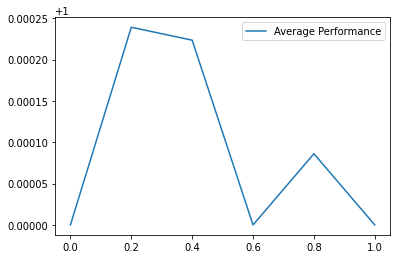

In [ ]:
sns.lineplot(data=df_m, err_style="bars", ci=95)

In [ ]:
index = ['0.0','0.2','0.4','0.6','0.8','1.0']

In [ ]:
df_1 = pd.DataFrame(np.mean(local_alg_theory_best_samples,axis=1),columns=["Average Rho"],index=index)

In [ ]:
df_2 = pd.DataFrame(np.mean(local_performance_best_samples,axis=1),columns=["Average Tighter Rho"],index=index)

In [ ]:
df_3 = pd.DataFrame(np.mean(local_ratio_best_samples,axis=1),columns=["Average Performance"],index=index)

In [ ]:
df_performance = pd.concat([df_1, df_2, df_3], axis=1)

In [ ]:
df_p = pd.DataFrame(np.array([0,0.2,0.4,0.6,0.8,1]), columns=["p"])

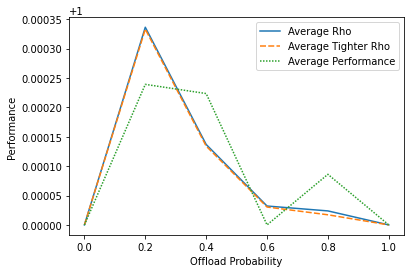

In [ ]:
ax = sns.lineplot(data=df_performance, err_style="bars", ci=95)
ax.set(xlabel = "Offload Probability", ylabel="Performance")
plt.show()

In [ ]:
df_mean1 = pd.DataFrame(np.mean(time_local_samples,axis=1), columns=["Local Processing Resource"],index=index)

In [ ]:
df_mean1

,Local Processing Resource
0.0,0.002736
0.2,0.002504
0.4,0.002565
0.6,0.002666
0.8,0.002727
1.0,0.002736


In [ ]:
df_mean2 = pd.DataFrame(np.mean(time_comm_samples,axis=1),columns=["Communication Resource"],index=index)

In [ ]:
df_mean2

,Communication Resource
0.0,0.000000
0.2,0.001577
0.4,0.002246
0.6,0.002516
0.8,0.002652
1.0,0.002736


In [ ]:
df_mean3 = pd.DataFrame(np.mean(time_remote_samples,axis=1),columns=["Remote Processing Resource"],index=index)

In [ ]:
df_mean3

,Remote Processing Resource
0.0,0.000000e+00
0.2,3.359634e-07
0.4,7.114242e-07
0.6,1.000200e-06
0.8,6.371543e-07
1.0,2.222817e-07


In [ ]:
df_p = pd.DataFrame(np.array([0,0.2,0.4,0.6,0.8,1]), columns=["p"])

In [ ]:
df_mean_time = pd.concat([df_mean1, df_mean2, df_mean3], axis=1)

In [ ]:
df_mean_time

,Local Processing Resource,Communication Resource,Remote Processing Resource
0.0,0.002736,0.000000,0.000000e+00
0.2,0.002504,0.001577,3.359634e-07
0.4,0.002565,0.002246,7.114242e-07
0.6,0.002666,0.002516,1.000200e-06
0.8,0.002727,0.002652,6.371543e-07
1.0,0.002736,0.002736,2.222817e-07


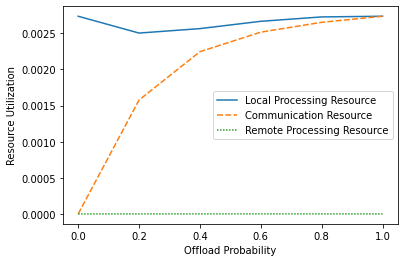

In [ ]:
ax = sns.lineplot(data=df_mean_time, err_style="bars", ci=95)
ax.set(xlabel = "Offload Probability", ylabel="Resource Utilization")
plt.show()

In [ ]:
#theoritical worst case for different ratios
#todo
bound_rho = []
p=1
for i in ratios:
  deno = 1+sum(vgg16_compute_values_remote_expected)*link_rate*math.sqrt(i)/np.min(input_data_real[:len(input_data_real)-1])
  bound_rho.append(1+(1-p)*in_ratio*i/deno)

In [ ]:
bound_rho

[1.0, 1.0, 1.0, 1.0, 1.0]

In [ ]:
rhos = np.array(ratio_local_samples)

In [ ]:
rhos_indices = np.array([rhos[:,i,:] for i in range(4)])

In [ ]:
rhos_indices[0].shape

(5, 7000)

In [ ]:
df_main = pd.DataFrame(columns = ['Average Competitive Ratio', 'Max Communication Latency Ratio', 'Average Slow-down Ratio'])
# df_1 = pd.DataFrame(columns = ['Average Competitive Ratio', 'Max Communication Latency Ratio', 'Average Slow-down Ratio'])
# df_2 = pd.DataFrame(columns = ['Average Competitive Ratio', 'Max Communication Latency Ratio', 'Average Slow-down Ratio'])
# df_3 = pd.DataFrame(columns = ['Average Competitive Ratio', 'Max Communication Latency Ratio', 'Average Slow-down Ratio'])
columns =['1.5x21.33', '2x21.33', '3x21.33', '4x21.33', '8x21.33']

In [ ]:
def populate(df):
  for k in range(2):
    for i in range(5):
      for j in range(7000):
        df.loc[len(df.index)] = [rhos_indices[k][i][j], columns[i], slow_down[k]]
  return df

In [ ]:
populate(df_main)

KeyboardInterrupt: ignored

In [ ]:
df_worst = pd.DataFrame(np.array(bound_rho), columns=["bound"])

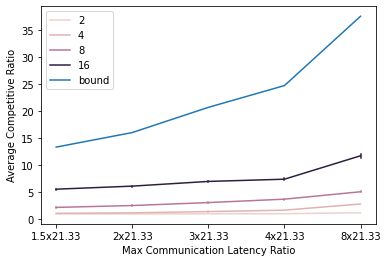

In [ ]:
sns.lineplot(x="Max Communication Latency Ratio",y="Average Competitive Ratio", hue="Average Slow-down Ratio", data=df_main, err_style="bars", ci=95)
sns.lineplot(data = df_worst )

In [ ]:
def populate1(df,k):
  for i in range(5):
    for j in range(7000):
      df.loc[len(df.index)] = [rhos_indices[k][i][j], columns[i]]
  return df

In [ ]:
df_0 = pd.DataFrame(columns = ['Average Competitive Ratio', 'Max Communication Latency Ratio'])
df_1 = pd.DataFrame(columns = ['Average Competitive Ratio', 'Max Communication Latency Ratio'])
df_2 = pd.DataFrame(columns = ['Average Competitive Ratio', 'Max Communication Latency Ratio'])
df_3 = pd.DataFrame(columns = ['Average Competitive Ratio', 'Max Communication Latency Ratio'])
columns =['1.5x21.33', '2x21.33', '3x21.33', '4x21.33', '8x21.33']

In [ ]:
populate1(df_0,0)
populate1(df_1,1)
populate1(df_2,2)
populate1(df_3,3)

,Average Competitive Ratio,Max Communication Latency Ratio
0,12.639690,1.5x21.33
1,6.360479,1.5x21.33
2,10.682490,1.5x21.33
3,11.768753,1.5x21.33
4,10.977571,1.5x21.33
...,...,...
34995,6.704312,8x21.33
34996,3.308726,8x21.33
34997,4.565913,8x21.33
34998,1.118576,8x21.33


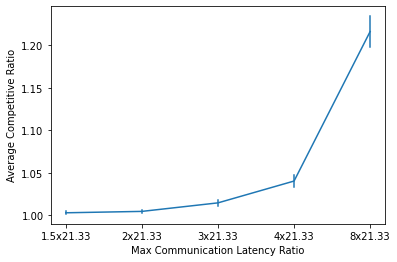

In [ ]:
sns.lineplot(x="Max Communication Latency Ratio",y="Average Competitive Ratio", data=df_0, err_style="bars", ci=95)


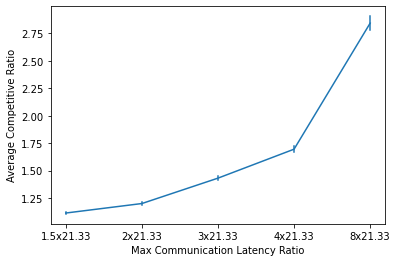

In [ ]:
sns.lineplot(x="Max Communication Latency Ratio",y="Average Competitive Ratio", data=df_1, err_style="bars", ci=95)


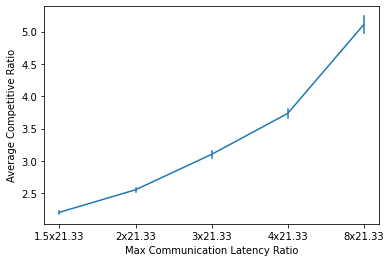

In [ ]:
sns.lineplot(x="Max Communication Latency Ratio",y="Average Competitive Ratio", data=df_2, err_style="bars", ci=95)


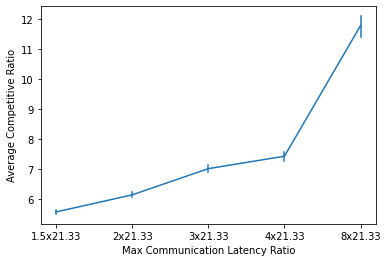

In [ ]:
sns.lineplot(x="Max Communication Latency Ratio",y="Average Competitive Ratio", data=df_3, err_style="bars", ci=95)
